In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Principal Component Analysis

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch05/wine.data', header=None)

In [2]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
# stratifyに指定したデータセットのラベルの比率を保ったまま分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [10]:
np.var(X_train, axis=0)

array([6.77935796e-01, 1.36704612e+00, 7.18653161e-02, 1.10691909e+01,
       1.97564711e+02, 3.78049168e-01, 1.03926937e+00, 1.46849636e-02,
       3.48232278e-01, 5.57011024e+00, 4.87437045e-02, 4.80177003e-01,
       1.05880114e+05])

In [13]:
S = np.dot((X_train - np.mean(X_train, axis=0)).T, (X_train - np.mean(X_train, axis=0))) / (X_train.shape[0])
print(S.shape)

(13, 13)


In [4]:
# 3種類のラベル
set(y)

{1, 2, 3}

In [5]:
# 13個の特徴量×124個のデータ
print(X_train_std.shape)
X_train_std[0]

(124, 13)


array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

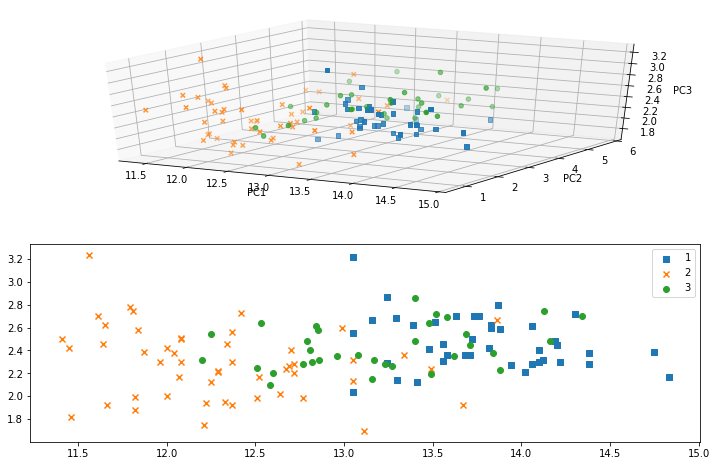

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211, projection='3d')
ax1 = fig.add_subplot(212)

colors = ['r', 'b', 'y']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    xs = X_train[y_train==l, 0]
    ys = X_train[y_train==l, 1]
    zs = X_train[y_train==l, 2]
    ax.scatter(xs, ys, zs, zdir='xs', marker=m, label=l)
    ax1.scatter(xs, zs, marker=m, label=l)
#     plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
#               c=c, label=l, marker=m)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
    
plt.legend()
plt.show()

In [6]:
import numpy as np
# 特徴量同士の共分散行列を作成
cov_mat = np.cov(X_train_std)
cov_mat.shape

(124, 124)

In [7]:
# 各特徴量, 同じ列のデータが1回の観測で得られたデータ
# 引数`rowvar=False`で, 各々の列を各特徴量にする
cov_mat = np.cov(X_train_std, rowvar=False)
cov_mat.shape

(13, 13)

In [8]:
# 固有値と固有ベクトルを計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(f'Eigenvalues \n{eigen_vals}')

Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [9]:
eigen_vecs.shape

(13, 13)

In [10]:
total = sum(eigen_vals)
# 分散説明率の累積和
var_exp = [(i/total)*100 for i in sorted(eigen_vals, reverse=True)]
var_exp_cum = np.cumsum(var_exp)
var_exp_cum

array([ 36.9514686 ,  55.38639566,  67.20155475,  74.53580652,
        80.95791434,  86.00963882,  89.96429272,  92.60821103,
        94.99753029,  96.62714407,  98.00716519,  99.17939143,
       100.        ])

14個の特徴量の内, 5個で80％の説明率に達していることがわかる.<br>
2軸で可視化できるよう, 今回は2次元に圧縮する

In [11]:
# (固有値, 固有ベクトル)のタプルのリストを作成
# eigen_pairs = [(np.abs(eigen_val), eigen_vec) for eigen_val, eigen_vec in zip(eigen_vals, eigen_vecs)]
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 固有値が大きい順にソート
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs[0]

(4.842745315655898,
 array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
        -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
        -0.32613263, -0.36861022, -0.29669651]))

In [17]:
# 上位2つの固有ベクトルから射影行列Wを作る
# np.hstackはaxis=1方向に結合. 1次元同士を結合すると1次元になってしまうので、明示的に２次元にする
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))
print(f'Matrix W \n {w}')

Matrix W 
 [[-0.13724218  0.50303478 -0.13774873]
 [ 0.24724326  0.16487119  0.09615039]
 [-0.02545159  0.24456476  0.67777567]
 [ 0.20694508 -0.11352904  0.62504055]
 [-0.15436582  0.28974518  0.19613548]
 [-0.39376952  0.05080104  0.14031057]
 [-0.41735106 -0.02287338  0.11705386]
 [ 0.30572896  0.09048885  0.13121778]
 [-0.30668347  0.00835233  0.0304309 ]
 [ 0.07554066  0.54977581 -0.07992997]
 [-0.32613263 -0.20716433  0.05305915]
 [-0.36861022 -0.24902536  0.13239103]
 [-0.29669651  0.38022942 -0.07065022]]


In [18]:
# trainデータを13次元から3次元に変換
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 3)

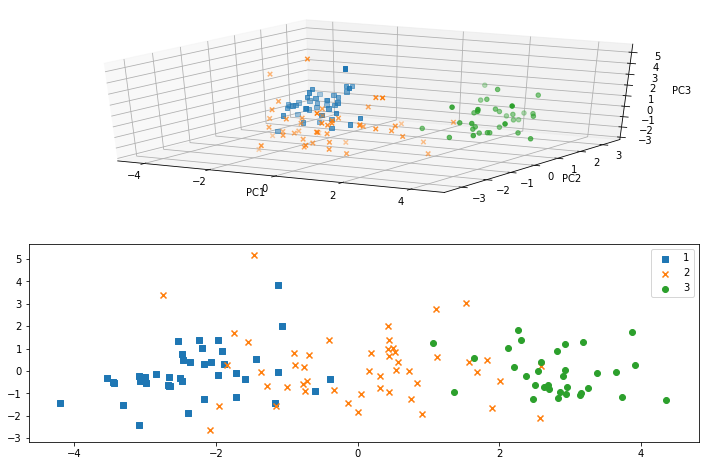

In [31]:
# プロット
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211, projection='3d')
ax1 = fig.add_subplot(212)

colors = ['r', 'b', 'y']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    xs = X_train_pca[y_train==l, 0]
    ys = X_train_pca[y_train==l, 1]
    zs = X_train_pca[y_train==l, 2]
    ax.scatter(xs, ys, zs, zdir='xs', marker=m, label=l)
    ax1.scatter(xs, zs, marker=m, label=l)
#     plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
#               c=c, label=l, marker=m)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
    
plt.legend()
plt.show()

# Singular Value Decomposition

In [34]:
# X_trainを特異値分解
U, S, V_T = np.linalg.svd(X_trrain_std)
V = V_T.T
print(U.shape)
print(V.shape)

(124, 124)
(13, 13)


In [40]:
S.shape

(13,)

え、sって特異値だったの...

In [44]:
# 固有値と固有ベクトルのタプルのリストを作成
eigen_pairs_svd = [(np.abs(S[i]), V[:,i]) for i in range(V.shape[0])]
# 大きいものから順に並び替え
eigen_pairs_svd.sort(key=lambda k: k[0], reverse=True)
eigen_pairs_svd[0]

(24.406099111199165,
 array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
        -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
        -0.32613263, -0.36861022, -0.29669651]))

In [43]:
# 上位2つの固有ベクトルから射影行列Wを作る
w_svd = np.hstack((eigen_pairs_svd[0][1][:, np.newaxis], eigen_pairs_svd[1][1][:, np.newaxis], eigen_pairs_svd[2][1][:, np.newaxis]))
print('Matrix W of SVD:\n', w_svd)

Matrix W of SVD:
 [[-0.13724218  0.50303478  0.13774873]
 [ 0.24724326  0.16487119 -0.09615039]
 [-0.02545159  0.24456476 -0.67777567]
 [ 0.20694508 -0.11352904 -0.62504055]
 [-0.15436582  0.28974518 -0.19613548]
 [-0.39376952  0.05080104 -0.14031057]
 [-0.41735106 -0.02287338 -0.11705386]
 [ 0.30572896  0.09048885 -0.13121778]
 [-0.30668347  0.00835233 -0.0304309 ]
 [ 0.07554066  0.54977581  0.07992997]
 [-0.32613263 -0.20716433 -0.05305915]
 [-0.36861022 -0.24902536 -0.13239103]
 [-0.29669651  0.38022942  0.07065022]]


In [46]:
# trainデータを13次元から3次元に変換
X_train_svd = np.dot(X_train_std,w_svd)

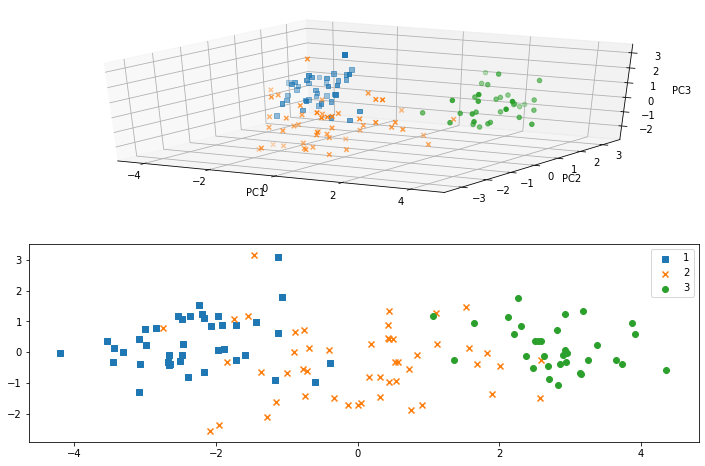

In [47]:
# プロット
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211, projection='3d')
ax1 = fig.add_subplot(212)

colors = ['r', 'b', 'y']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    xs = X_train_svd[y_train==l, 0]
    ys = X_train_svd[y_train==l, 1]
    zs = X_train_std[y_train==l, 2]
    ax.scatter(xs, ys, zs, zdir='xs', marker=m, label=l)
    ax1.scatter(xs, zs, marker=m, label=l)
#     plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
#               c=c, label=l, marker=m)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
    
plt.legend()
plt.show()

PCAでの結果とほぼ一緒であることが伺える

## sklearnを使う

In [50]:
from sklearn.decomposition import PCA, TruncatedSVD

In [54]:
pca = PCA(n_components=3, random_state=1)
svd = TruncatedSVD(n_components=3, random_state=1)
X_train_pca = pca.fit(X_train_std)
X_train_svd = svd.fit(X_train_std,)
print('--------PCA---------')
print(sorted(X_train_pca.singular_values_, reverse=True))
print('--------SCD---------')
print(sorted(X_train_svd.singular_values_,reverse=True))

--------PCA---------
[24.406099111199143, 17.238649140966103, 13.800737828279445]
--------SCD---------
[24.40609911119915, 17.2386491409661, 13.80073782827944]


一発

## 標準化しなかった時

In [58]:
X_train_svd = svd.fit(X_train)
print('--------SCD---------')
print(sorted(X_train_svd.singular_values_,reverse=True))

--------SCD---------
[9215.426267046227, 415.89894328003066, 46.46118065532126]


In [60]:
# trainデータを13次元から3次元に変換
X_train_svd = svd.transform(X_train_std)

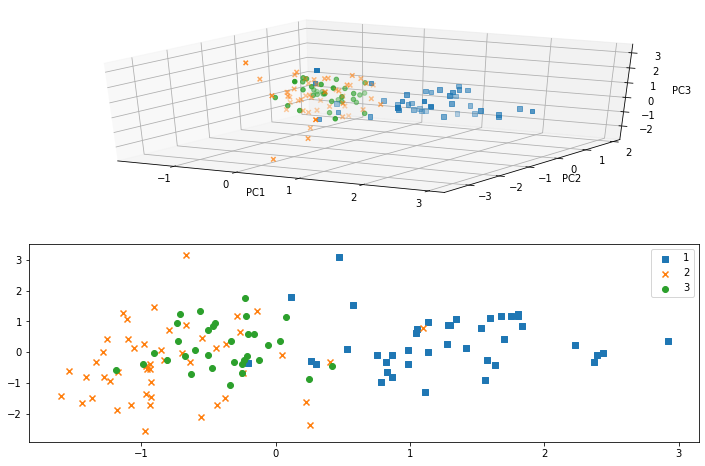

In [61]:
# プロット
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211, projection='3d')
ax1 = fig.add_subplot(212)

colors = ['r', 'b', 'y']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    xs = X_train_svd[y_train==l, 0]
    ys = X_train_svd[y_train==l, 1]
    zs = X_train_std[y_train==l, 2]
    ax.scatter(xs, ys, zs, zdir='xs', marker=m, label=l)
    ax1.scatter(xs, zs, marker=m, label=l)
#     plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
#               c=c, label=l, marker=m)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
    
plt.legend()
plt.show()

いつも標準化した方が良さそう

In [2]:
!conda list

# packages in environment at /Users/akiemac/.pyenv/versions/anaconda3-4.2.0:
#
# Name                    Version                   Build  Channel
absl-py                   0.9.0                    pypi_0    pypi
anaconda-clean            1.1.0                    py36_1  
appnope                   0.1.0            py36hf537a9a_0  
arrow-cpp                 0.15.1           py36h3051d0f_5  
asn1crypto                1.3.0                    py36_0  
astor                     0.8.1                    pypi_0    pypi
attrs                     19.3.0                     py_0  
audioread                 2.1.8                    pypi_0    pypi
backcall                  0.1.0                    py36_0  
beautifulsoup4            4.8.2                    py36_0  
blas                      1.0                    openblas  
bleach                    3.1.0                    py36_0  
boost-cpp                 1.67.0               h1de35cc_4  
brotli                    1.0.7                h0a44026_